 we will learn how to use the Keras library to build models for classificaiton problems. We will use the popular MNIST dataset, a dataset of images, for a change.
 The MNIST database, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.
 The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau

In [48]:
import keras
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [49]:
#read the data
(X_train, y_train),(X_test, y_test)=mnist.load_data()
X_train.shape


(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in dataset. So, each image is 28 pixels by 28 pixels.

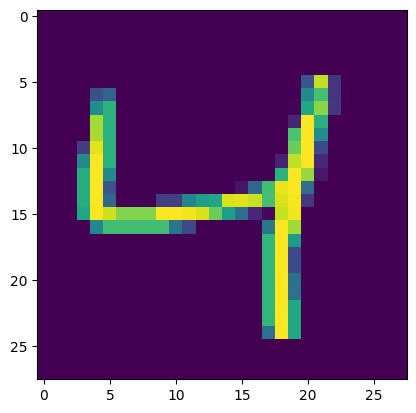

In [50]:
#Let's visualize the first image in the training set using Matplotlib's scripting layer.
plt.imshow(X_train[2])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.
784 inputs, one input for each pixel

In [51]:
#flatten images into one-dimensional vector
num_pixels= X_train.shape[1] * X_train.shape[2]  ## find size of one-dimensional vector
X_train= X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
X_test= X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.

In [52]:
X_train =X_train/255
X_test= X_test/255

In [53]:
#for classification we need to divide our target variable into categories
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
num_classes= y_test.shape[1]
print(num_classes)

10


In [54]:
#build a neural network
def classification_model():
    model=Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))

    #compile model
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [55]:
#train and test the model
model= classification_model()
#fit the model
model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=10, verbose =2)
#evaluate the model
scores= model.evaluate(X_test,y_test,verbose=0)
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1])) 

Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9438 - loss: 0.1861 - val_accuracy: 0.9707 - val_loss: 0.0956
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9750 - loss: 0.0782 - val_accuracy: 0.9760 - val_loss: 0.0775
Epoch 3/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9833 - loss: 0.0527 - val_accuracy: 0.9805 - val_loss: 0.0673
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9868 - loss: 0.0405 - val_accuracy: 0.9790 - val_loss: 0.0736
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9904 - loss: 0.0305 - val_accuracy: 0.9742 - val_loss: 0.0946
Epoch 6/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9912 - loss: 0.0269 - val_accuracy: 0.9816 - val_loss: 0.0736
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9923 - loss: 0.0228 - val_accuracy: 0.9787 - val_loss: 0.0966
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9944 - loss: 0.0182 - val_accuracy: 0.9810 - val_loss: 0.0778
Epoch 9/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9946 - loss: 0.0176 - val_accuracy: 0.9788 - 

In [56]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,084,852 (7.95 MB)

 Trainable params: 694,950 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,389,902 (5.30 MB)

Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.

In [60]:
model.save("classification_model.keras")

When you are ready to use your model again, you use the load_model function from keras.saving.

In [62]:
pretrained_model= keras.saving.load_model('classification_model.keras')
# Further train the loaded model
pretrained_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores_20_epochs = pretrained_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy_10_epochs: {}% \n Accuracy_20_epochs: {}'.format(scores[1], scores_20_epochs[1])) 

Epoch 1/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9954 - loss: 0.0145 - val_accuracy: 0.9766 - val_loss: 0.1292
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9963 - loss: 0.0120 - val_accuracy: 0.9818 - val_loss: 0.1017
Epoch 3/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 0.9818 - val_loss: 0.0996
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9965 - loss: 0.0114 - val_accuracy: 0.9799 - val_loss: 0.1028
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9965 - loss: 0.0115 - val_accuracy: 0.9804 - val_loss: 0.1099
Epoch 6/10
1875/1875 - 5s - 2ms/step - accuracy: 0.9963 - loss: 0.0130 - val_accuracy: 0.9822 - val_loss: 0.1096
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.9821 - val_loss: 0.1296
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9969 - loss: 0.0120 - val_accuracy: 0.9787 - val_loss: 0.1191
Epoch 9/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9975 - loss: 0.0084 - val_accuracy: 0.9823 - 